In [2]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [69]:
# Loading the dataset

df = pd.read_csv("C:\\Users\\kamal\\Downloads\\7b73f18d-56e6-4453-85ba-1f16041a9a70_1716878674079_Decision-Tree-20240513T152323Z-001-1-\\Decision Tree\\heart_disease.csv",encoding = 'latin')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,FALSE,1.5,upsloping,fixed defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,TRUE,3.0,flat,normal,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,TRUE,2.5,downsloping,reversable defect,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [71]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [72]:
df['oldpeak'].fillna(df['oldpeak'].mean(),inplace = True)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.300000,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.000000,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.400000,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.000000,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.500000,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,FALSE,1.500000,upsloping,fixed defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,TRUE,3.000000,flat,normal,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,TRUE,2.500000,downsloping,reversable defect,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,0.891253,downsloping,fixed defect,4


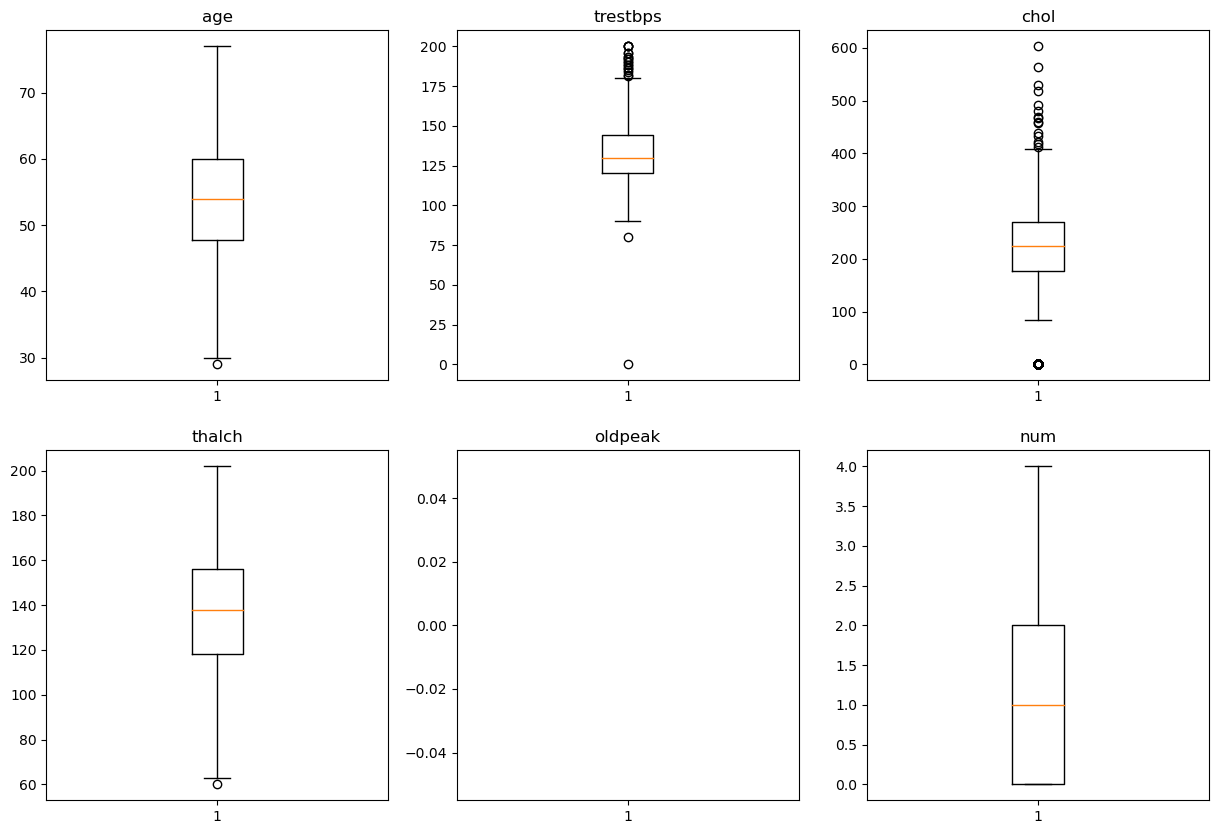

In [6]:
# Boxplot for detecting outliers

column = df[['age','trestbps','chol','thalch','oldpeak','num']]
fig,axs = plt.subplots(2,3, figsize=(15,10))
axs = axs.flatten()

for i,col in enumerate(column):  
    axs[i].boxplot(df[col])
    axs[i].set_title(col)

In [7]:
categorical = df.select_dtypes(include = ['object']).columns
df[categorical]

,sex,cp,restecg,exang,slope,thal
0,Male,typical angina,lv hypertrophy,FALSE,downsloping,fixed defect
1,Male,atypical angina,normal,FALSE,flat,fixed defect
2,Male,asymptomatic,normal,FALSE,flat,fixed defect
3,Male,typical angina,lv hypertrophy,FALSE,flat,fixed defect
4,Male,asymptomatic,normal,TRUE,flat,fixed defect
...,...,...,...,...,...,...
903,Male,asymptomatic,normal,FALSE,upsloping,fixed defect
904,Male,asymptomatic,st-t abnormality,TRUE,flat,normal
905,Male,non-anginal,lv hypertrophy,TRUE,downsloping,reversable defect
906,Male,non-anginal,st-t abnormality,TURE,downsloping,fixed defect


In [8]:
# Replacing the wrong value

df['exang'] = df['exang'].replace('TURE', 'TRUE')

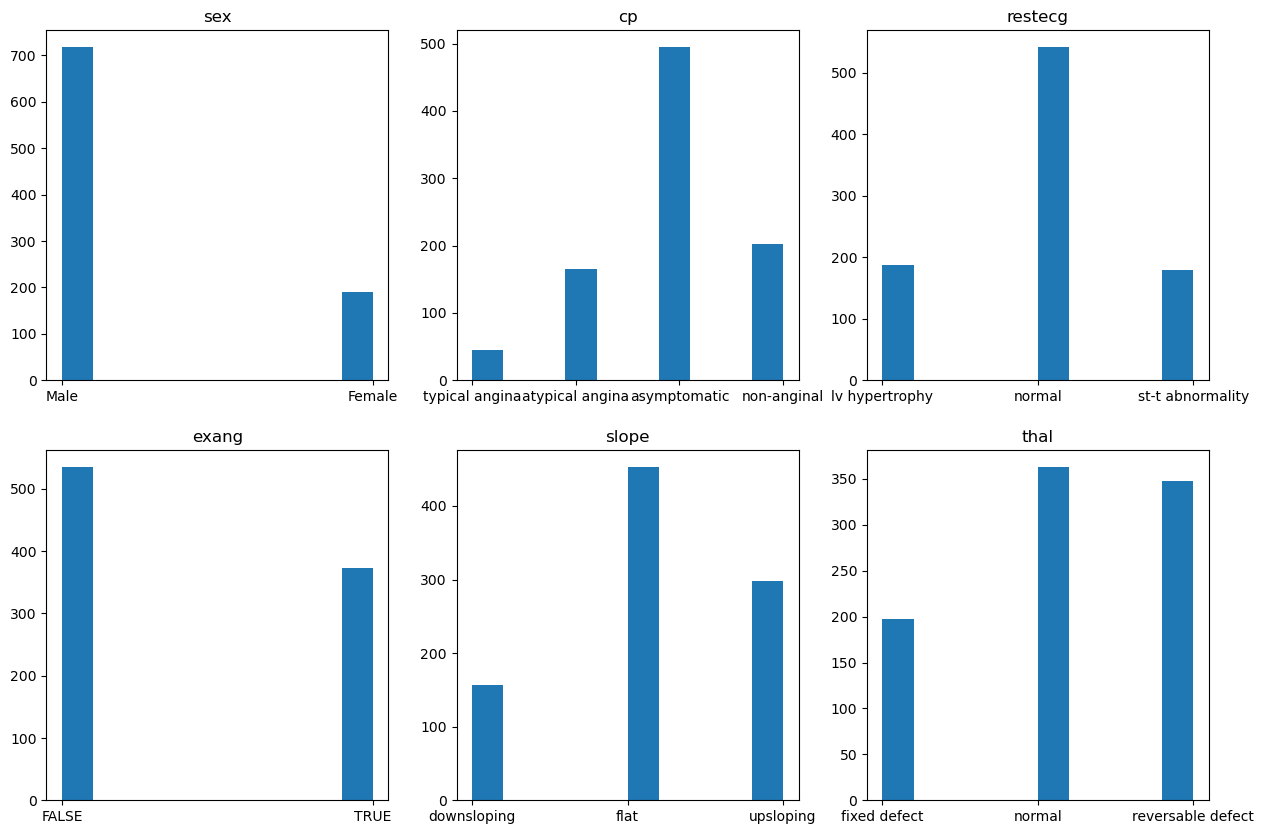

In [9]:
fig,axs = plt.subplots(2,3, figsize=(15,10))
axs = axs.flatten()

for i,col in enumerate(df[categorical]):
    axs[i].hist(df[col])
    axs[i].set_title(col)

In [73]:
# Converting categorical data 

df1 = pd.get_dummies(df[categorical],columns = df[categorical].columns,dtype = 'int')
df1

,sex_Female,sex_Male,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,exang_FALSE,exang_TRUE,exang_TURE,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0
1,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0
2,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0
3,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0
4,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0
904,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0
905,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1
906,0,1,0,0,1,0,0,0,1,0,0,1,1,0,0,1,0,0


In [74]:
df2 = df.select_dtypes(include = ['int64','float64'])
df2.drop(['num'],axis = 1,inplace = True)
df2

,age,trestbps,chol,thalch,oldpeak
0,63,145,233,150,2.300000
1,41,135,203,132,0.000000
2,57,140,192,148,0.400000
3,52,118,186,190,0.000000
4,57,110,201,126,1.500000
...,...,...,...,...,...
903,53,125,0,120,1.500000
904,62,166,170,120,3.000000
905,56,170,0,123,2.500000
906,56,144,208,105,0.891253


In [75]:
# Combining both df1 and df2

df3 = pd.concat([df1,df2],axis = 1)
df3

,sex_Female,sex_Male,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,exang_FALSE,...,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect,age,trestbps,chol,thalch,oldpeak
0,0,1,0,0,0,1,1,0,0,1,...,0,0,1,0,0,63,145,233,150,2.300000
1,0,1,0,1,0,0,0,1,0,1,...,1,0,1,0,0,41,135,203,132,0.000000
2,0,1,1,0,0,0,0,1,0,1,...,1,0,1,0,0,57,140,192,148,0.400000
3,0,1,0,0,0,1,1,0,0,1,...,1,0,1,0,0,52,118,186,190,0.000000
4,0,1,1,0,0,0,0,1,0,0,...,1,0,1,0,0,57,110,201,126,1.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,0,1,1,0,0,0,0,1,0,1,...,0,1,1,0,0,53,125,0,120,1.500000
904,0,1,1,0,0,0,0,0,1,0,...,1,0,0,1,0,62,166,170,120,3.000000
905,0,1,0,0,1,0,1,0,0,0,...,0,0,0,0,1,56,170,0,123,2.500000
906,0,1,0,0,1,0,0,0,1,0,...,0,0,1,0,0,56,144,208,105,0.891253


In [76]:
# Adding target column to new dataframe

df3['num'] = df['num']
df3

,sex_Female,sex_Male,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,exang_FALSE,...,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect,age,trestbps,chol,thalch,oldpeak,num
0,0,1,0,0,0,1,1,0,0,1,...,0,1,0,0,63,145,233,150,2.300000,0
1,0,1,0,1,0,0,0,1,0,1,...,0,1,0,0,41,135,203,132,0.000000,0
2,0,1,1,0,0,0,0,1,0,1,...,0,1,0,0,57,140,192,148,0.400000,0
3,0,1,0,0,0,1,1,0,0,1,...,0,1,0,0,52,118,186,190,0.000000,0
4,0,1,1,0,0,0,0,1,0,0,...,0,1,0,0,57,110,201,126,1.500000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,0,1,1,0,0,0,0,1,0,1,...,1,1,0,0,53,125,0,120,1.500000,4
904,0,1,1,0,0,0,0,0,1,0,...,0,0,1,0,62,166,170,120,3.000000,4
905,0,1,0,0,1,0,1,0,0,0,...,0,0,0,1,56,170,0,123,2.500000,4
906,0,1,0,0,1,0,0,0,1,0,...,0,1,0,0,56,144,208,105,0.891253,4


In [77]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   sex_Female                908 non-null    int32  
 1   sex_Male                  908 non-null    int32  
 2   cp_asymptomatic           908 non-null    int32  
 3   cp_atypical angina        908 non-null    int32  
 4   cp_non-anginal            908 non-null    int32  
 5   cp_typical angina         908 non-null    int32  
 6   restecg_lv hypertrophy    908 non-null    int32  
 7   restecg_normal            908 non-null    int32  
 8   restecg_st-t abnormality  908 non-null    int32  
 9   exang_FALSE               908 non-null    int32  
 10  exang_TRUE                908 non-null    int32  
 11  exang_TURE                908 non-null    int32  
 12  slope_downsloping         908 non-null    int32  
 13  slope_flat                908 non-null    int32  
 14  slope_upsl

In [78]:
df3.drop(['sex_Male','sex_Female'],axis = 1, inplace = True)

In [79]:
X = df3.iloc[:,:-1]
Y = df3.iloc[:,-1:]

In [80]:
# Dividing the dataset

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3,random_state = 42)

In [97]:
model = DecisionTreeClassifier(criterion = 'gini', max_depth = 10, min_samples_split = 15)
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10, min_samples_split=15)

In [98]:
model.feature_importances_

array([0.23906232, 0.        , 0.        , 0.00554448, 0.00740521,
       0.00672982, 0.01323334, 0.01508507, 0.03711605, 0.        ,
       0.        , 0.        , 0.0139063 , 0.        , 0.0327388 ,
       0.02901132, 0.0859946 , 0.08004615, 0.16916791, 0.12390405,
       0.14105458])

In [99]:
train_pred = model.predict(x_train)
print(classification_report(y_train,train_pred))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       277
           1       0.69      0.70      0.70       183
           2       0.55      0.36      0.44        75
           3       0.64      0.57      0.60        79
           4       0.69      0.43      0.53        21

    accuracy                           0.73       635
   macro avg       0.67      0.59      0.62       635
weighted avg       0.71      0.73      0.72       635



In [100]:
test_pred = model.predict(x_test)
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.65      0.80      0.71       122
           1       0.37      0.38      0.38        82
           2       0.36      0.15      0.21        34
           3       0.18      0.14      0.16        28
           4       0.00      0.00      0.00         7

    accuracy                           0.50       273
   macro avg       0.31      0.29      0.29       273
weighted avg       0.46      0.50      0.47       273



In [105]:
!pip install xgboost

In [108]:
from xgboost import XGBClassifier

In [112]:
model2 = XGBClassifier()
model2.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [115]:
y_train_pred = model2.predict(x_train)
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       277
           1       1.00      1.00      1.00       183
           2       1.00      1.00      1.00        75
           3       1.00      1.00      1.00        79
           4       1.00      1.00      1.00        21

    accuracy                           1.00       635
   macro avg       1.00      1.00      1.00       635
weighted avg       1.00      1.00      1.00       635



In [116]:
y_test_pred = model2.predict(x_test)
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.73      0.78      0.75       122
           1       0.41      0.46      0.43        82
           2       0.42      0.24      0.30        34
           3       0.20      0.18      0.19        28
           4       0.00      0.00      0.00         7

    accuracy                           0.53       273
   macro avg       0.35      0.33      0.34       273
weighted avg       0.52      0.53      0.52       273



In [118]:
from sklearn.ensemble import RandomForestClassifier

In [121]:
model3 = RandomForestClassifier(max_features = 4)
model3.fit(x_train,y_train)

RandomForestClassifier(max_features=4)

In [123]:
y_train_pred2 = model3.predict(x_train)
print(classification_report(y_train,y_train_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       277
           1       1.00      1.00      1.00       183
           2       1.00      1.00      1.00        75
           3       1.00      1.00      1.00        79
           4       1.00      1.00      1.00        21

    accuracy                           1.00       635
   macro avg       1.00      1.00      1.00       635
weighted avg       1.00      1.00      1.00       635



In [124]:
y_test_pred2 = model3.predict(x_test)
print(classification_report(y_test,y_test_pred2))

              precision    recall  f1-score   support

           0       0.70      0.82      0.75       122
           1       0.41      0.50      0.45        82
           2       0.44      0.12      0.19        34
           3       0.24      0.14      0.18        28
           4       0.33      0.14      0.20         7

    accuracy                           0.55       273
   macro avg       0.42      0.34      0.35       273
weighted avg       0.52      0.55      0.52       273

